In [0]:
!pip install tensorflow-gpu==2.0.0-rc1

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
TOTAL_EPOCH = 150
BATCH_SIZE = 64
LEARN_RATE = 3e-4
N_HIDDEN = 256
N_INPUT = 28 * 28
N_NOISE = 128

In [0]:
with tf.variable_scope('GAN'):
  x = tf.placeholder(tf.float32, [None, N_INPUT])
  z = tf.placeholder(tf.float32, [None, N_NOISE])

  with tf.name_scope("Generator"):
    G_W1 = tf.get_variable("G_W1", shape = [N_NOISE, N_HIDDEN],
                          initializer = tf.keras.initializers.he_normal())
    G_b1 = tf.Variable(tf.random_normal([N_HIDDEN]), name='G_b1')
    G_W2 = tf.get_variable("G_W2", shape = [N_HIDDEN, N_INPUT],
                          initializer = tf.keras.initializers.he_normal())
    G_b2 = tf.Variable(tf.random_normal([N_INPUT]), name='G_b2')

  with tf.name_scope("Discriminator"):
    D_W1 = tf.get_variable("D_W1", shape = [N_INPUT, N_HIDDEN],
                          initializer = tf.keras.initializers.he_normal())
    D_b1 = tf.Variable(tf.random_normal([N_HIDDEN]), name='D_b1')
    D_W2 = tf.get_variable("D_W2", shape = [N_HIDDEN, N_NOISE],
                          initializer = tf.keras.initializers.he_normal())
    D_b2 = tf.Variable(tf.random_normal([N_NOISE]), name='D_b2')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def generator(noise):
  hidden = tf.nn.relu(tf.matmul(noise, G_W1) + G_b1)
  output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)

  return output
      
def discriminator(inputs):
  hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
  output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)

  return output

def get_noise(batch_size, n_noise):
  return np.random.normal(size=(batch_size, n_noise))

In [0]:
G = generator(z)
D_gene = discriminator(G)
D_real = discriminator(x)

In [0]:
with tf.variable_scope('GAN'):
  with tf.name_scope('Loss'):
    loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1-D_gene))
    loss_G = tf.reduce_mean(tf.log(D_gene)) 

  D_var_list = [D_W1, D_b1, D_W2, D_b2]
  G_var_list = [G_W1, G_b1, G_W2, G_b2]

  with tf.name_scope('Train'):
    train_D = tf.train.AdamOptimizer(LEARN_RATE, epsilon=1e-4).minimize(-loss_D, var_list=D_var_list)
    train_G = tf.train.AdamOptimizer(LEARN_RATE, epsilon=1e-4).minimize(-loss_G, var_list=G_var_list)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch: 0000   D_loss: -0.1014   G_loss: -3.5729


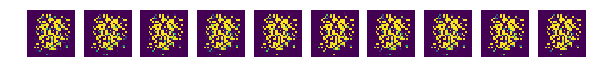

Epoch: 0001   D_loss: -0.1570   G_loss: -3.5467
Epoch: 0002   D_loss: -0.1290   G_loss: -3.6662


In [0]:
total_batch = int(mnist.train.num_examples / BATCH_SIZE)
loss_val_D, loss_val_G = 0, 0

for epoch in range(TOTAL_EPOCH):
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    noise = get_noise(BATCH_SIZE, N_NOISE)
    
    
    _, loss_val_D = sess.run([train_D, loss_D],
                            {x:batch_xs, z:noise})
    _, loss_val_G = sess.run([train_G, loss_G],
                            {z:noise})
    
  print("Epoch: {:04d}   D_loss: {:.4f}   G_loss: {:.4f}".format(epoch, loss_val_D, loss_val_G))
  
  if epoch == 0 or (epoch+1)%10 == 0:
    sample_size = 10
    noise = get_noise(sample_size, N_NOISE)
    samples = sess.run(G, feed_dict = {z: noise})
    
    fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))
    
    for i in range(sample_size):
      ax[i].set_axis_off()
      ax[i].imshow(np.reshape(samples[i], (28, 28)))
      
    plt.show()
    
#     plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')

Epoch: 0000   D_loss: -0.0066   G_loss: -6.9597


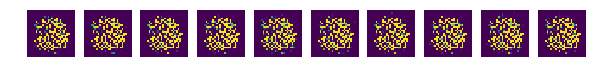

Epoch: 0001   D_loss: -0.0037   G_loss: -7.6527
Epoch: 0002   D_loss: -0.0322   G_loss: -5.9636
Epoch: 0003   D_loss: -0.0100   G_loss: -5.7882
Epoch: 0004   D_loss: -0.0845   G_loss: -4.5781
Epoch: 0005   D_loss: -0.1035   G_loss: -3.6044
Epoch: 0006   D_loss: -0.1236   G_loss: -3.6696
Epoch: 0007   D_loss: -0.4645   G_loss: -2.8875
Epoch: 0008   D_loss: -0.1364   G_loss: -3.4957
Epoch: 0009   D_loss: -0.3748   G_loss: -3.0939


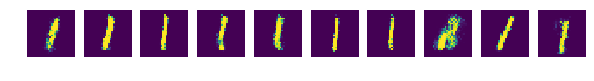

Epoch: 0010   D_loss: -0.4450   G_loss: -2.5025
Epoch: 0011   D_loss: -0.3447   G_loss: -2.7544
Epoch: 0012   D_loss: -0.2952   G_loss: -3.1060
Epoch: 0013   D_loss: -0.2306   G_loss: -2.7140
Epoch: 0014   D_loss: -0.3114   G_loss: -3.8181
Epoch: 0015   D_loss: -0.3491   G_loss: -3.0392
Epoch: 0016   D_loss: -0.3366   G_loss: -2.7005
Epoch: 0017   D_loss: -0.2715   G_loss: -2.3329
Epoch: 0018   D_loss: -0.3534   G_loss: -3.2077
Epoch: 0019   D_loss: -0.3533   G_loss: -3.3421


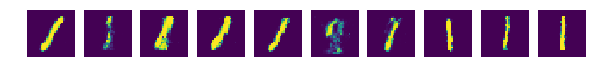

Epoch: 0020   D_loss: -0.2572   G_loss: -3.4591
Epoch: 0021   D_loss: -0.3039   G_loss: -2.8661
Epoch: 0022   D_loss: -0.2385   G_loss: -3.1250
Epoch: 0023   D_loss: -0.4561   G_loss: -2.8450
Epoch: 0024   D_loss: -0.1296   G_loss: -3.3217
Epoch: 0025   D_loss: -0.4258   G_loss: -3.1968
Epoch: 0026   D_loss: -0.3224   G_loss: -2.7955
Epoch: 0027   D_loss: -0.2562   G_loss: -2.5021
Epoch: 0028   D_loss: -0.2040   G_loss: -2.7165
Epoch: 0029   D_loss: -0.3162   G_loss: -2.6030


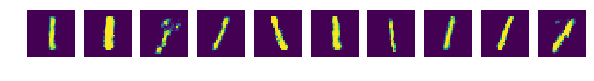

KeyboardInterrupt: ignored

In [0]:
total_batch = int(mnist.train.num_examples / BATCH_SIZE)
loss_val_D, loss_val_G = 0, 0

unrolled_num = 3
for epoch in range(TOTAL_EPOCH):
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    noise = get_noise(BATCH_SIZE, N_NOISE)
    
    for u in range(unrolled_num):
      _, loss_val_D = sess.run([train_D, loss_D],
                            {x:batch_xs, z:noise})
    
    _, loss_val_G = sess.run([train_G, loss_G],
                            {z:noise})
    
  print("Epoch: {:04d}   D_loss: {:.4f}   G_loss: {:.4f}".format(epoch, loss_val_D, loss_val_G))
  
  if epoch == 0 or (epoch+1)%10 == 0:
    sample_size = 10
    noise = get_noise(sample_size, N_NOISE)
    samples = sess.run(G, feed_dict = {z: noise})
    
    fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))
    
    for i in range(sample_size):
      ax[i].set_axis_off()
      ax[i].imshow(np.reshape(samples[i], (28, 28)))
      
    plt.show()
    
#     plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')